In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("candidatos_info_politica.csv", sep=';', encoding="ANSI")

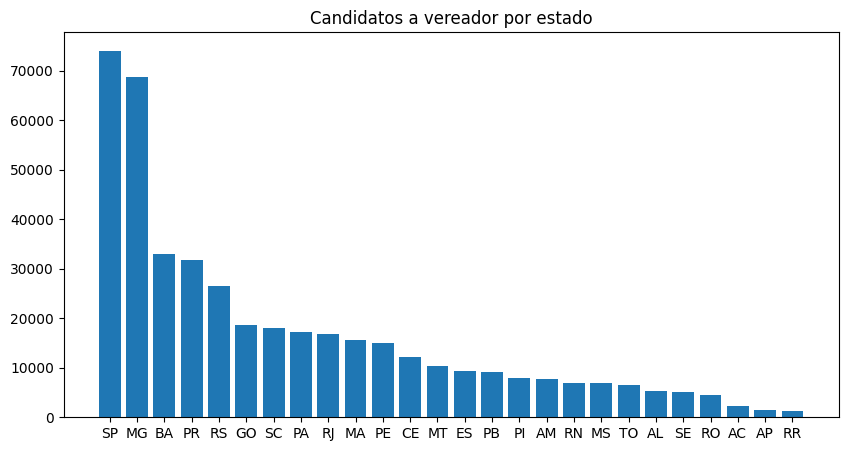

In [54]:
df_candidatos_vereador = df[df["DS_CARGO"]== "VEREADOR"]
candidatos_vereador_uf = df_candidatos_vereador[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
candidatos_vereador_uf = candidatos_vereador_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(candidatos_vereador_uf.index, candidatos_vereador_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a vereador por estado")
plt.show()

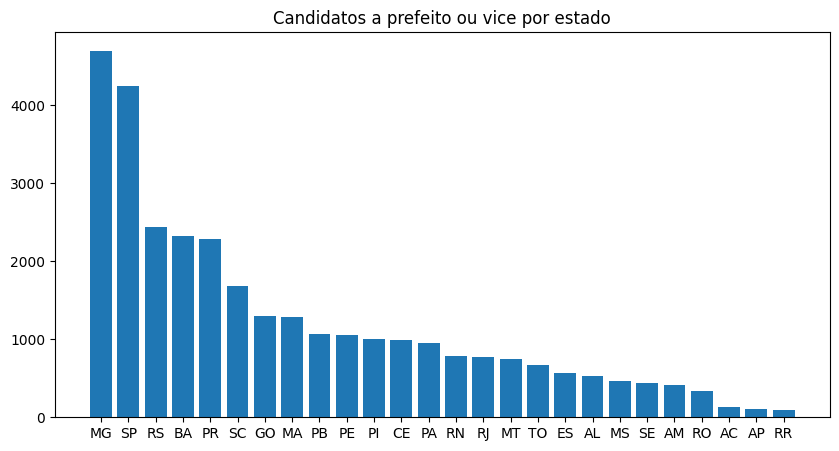

In [55]:
df_candidatos_prefeito_vice = df[df["DS_CARGO"] != "VEREADOR"]
candidatos_prefeitura_uf = df_candidatos_prefeito_vice[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
candidatos_prefeitura_uf = candidatos_prefeitura_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(candidatos_prefeitura_uf.index, candidatos_prefeitura_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a prefeito ou vice por estado")
plt.show()

In [56]:
populcacao_por_estados = pd.read_csv("população_estados.csv", sep=";") # Nomes de arquivos não deveriam ter ã ç 
candidatos_vereador_uf = candidatos_vereador_uf.merge(populcacao_por_estados, on="SG_UF")

,SG_UF,NM_URNA_CANDIDATO,POPULACAO
0,SP,74043,44411238
1,MG,68741,20538718
2,BA,32879,14141626
3,PR,31718,11444380
4,RS,26576,10882965
5,GO,18668,7056495
6,SC,17933,7610361
7,PA,17135,8121025
8,RJ,16812,16054524
9,MA,15543,6775805


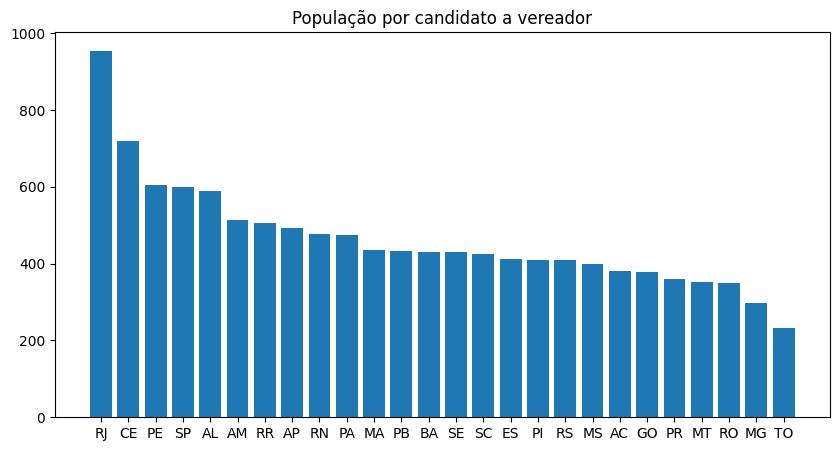

In [61]:
candidatos_vereador_uf["POP_CANDIDATO"] = candidatos_vereador_uf["POPULACAO"]/candidatos_vereador_uf["NM_URNA_CANDIDATO"]
candidatos_vereador_uf = candidatos_vereador_uf.sort_values(by="POP_CANDIDATO", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(candidatos_vereador_uf["SG_UF"], candidatos_vereador_uf["POP_CANDIDATO"])
plt.title("População por candidato a vereador")
plt.show()